# Projeto Gym Model Fitness

## Análise dos perfis dos clientes, rotatividade/churn e estratégia de retenção de clientes

# Introdução

A rede de academias Model Fitness está desenvolvendo uma estratégia de interação com o cliente baseados em dados analíticos.

Um dos problemas mais comuns que academias e outros serviços enfrentam é a rotatividade de clientes. Como você sabe se um cliente não está mais com você? Você pode calcular a rotatividade baseado nas pessoas que se livram das suas contas ou não renovam seus contratos. No entanto, às vezes não é óbvio que um cliente saiu: eles podem sair de fininho.

Projeto:

 - Aprender a predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente;

 - Elabore retratos de usuários típicos: selecione os grupos mais marcantes e descreva suas principais características;

 - Analise os fatores que mais impactam a rotatividade;

 - Tire conclusões básicas e desenvolva recomendações sobre como melhorar o serviço de clientes:
 
Identifique grupos alvo;
Sugira medidas para diminuir a rotatividade;
Descreva qualquer outro padrão que você vir com respeito às interações com clientes;

## Sumário

1. [Abertura dos dados](#abertura_dados)
    * 1.1 [Preparação dos dados](#verificacao_dados)
    * 1.2 [Verificação de dados duplicados e nulos](#verificacao_dados)
2. [Análise exploratória dos dados (AED)](#analise_exploratoria)
    * 2.1 [Gráficos de Barras - Proporção](#graf_barra)
    * 2.2 [Exploração estatisticas](#exploracao_est)
    * 2.3 [Histogramas](#histogramas)
    * 2.4 [Correlações](#correl)
3. [Hipóteses e Verificações](#verificacoes)
    * 3.1 [Parâmetros iniciais](#parametros)
    * 3.2 [Funções das métricas: Classificação e Regressão](#metricas)
    * 3.3 [Funções dos gráficos de importância: Classificação e Regressão](#graf_import)
    * 3.4 [Funções dos códigos os Gráficos Cluster](#cluster)
4. [Previsão de Churn / Rotatividade](#previsao)
5. [Interpretação dos Resultados](#resultados)
6. [Conclusão](#conclusao)

<a id="abertura_dados"></a>
## 1. Abertura dos dados

In [42]:
import pandas as pd

import datetime as dt

import numpy as np
import math as mth

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from plotly import graph_objects as go
import plotly.express as px

import re

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelos de Regressão
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Modelos de Clusterização
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage # Para Clusterização Hierárquica

# Métricas de Avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
df = pd.read_csv('gym_churn_us.csv', sep = ',')

In [44]:
# informações iniciais

print(df.head(15))

    gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0        1              1        1              1      0                6   
1        0              1        0              0      1               12   
2        0              1        1              0      1                1   
3        0              1        1              1      1               12   
4        1              1        1              1      1                1   
5        1              1        0              0      1                1   
6        1              1        1              1      0                6   
7        0              1        0              0      1                1   
8        1              1        1              1      1                1   
9        0              1        0              0      1                1   
10       0              1        0              0      0                6   
11       1              1        1              0      1                1   

In [45]:
# informações iniciais

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [46]:
# informações iniciais

print(df.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

<a id="verificacao_dados"></a>
### 1.1 Preparação dos dados 

Observações: Sem dados em formato de datetime para transformar

In [47]:
# transformação de data/hora e criação da coluna data

# df[''] = pd.to_datetime(df[''])



<a id="dupli_null"></a>
### 1.2 Verificação de duplicados e nulos 

Observações: Sem dados nulos e duplicados

In [48]:
# nulos e duplicados

# print('nulos:\n', df.isna().sum())
# print()
# print('diplicados: ',df.duplicated().sum())

<a id="analise_exploratoria"></a>
## 2. Análise exploratória dos dados (AED)

In [49]:
'''
df.columns
Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')
'''

"\ndf.columns\nIndex(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',\n       'Contract_period', 'Group_visits', 'Age',\n       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',\n       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',\n       'Churn'],\n      dtype='object')\n"

<a id="graf_barra"></a>
### 2.1 Gráficos de Barras - Proporção

Observações: os dados da coluna Churn são desproporcionais, ou seja, existem muito mais casos de não Churn/Rotatividade do que de saída de clientes

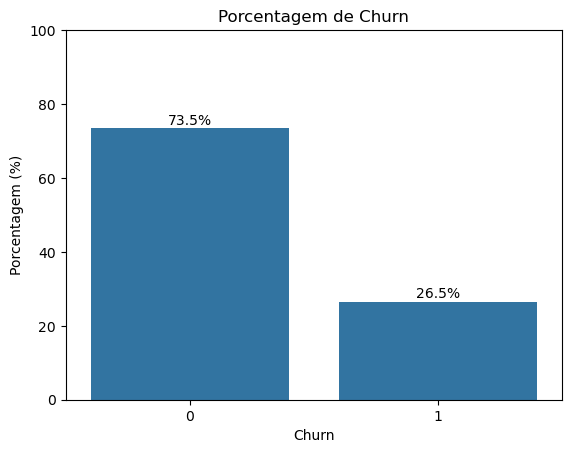

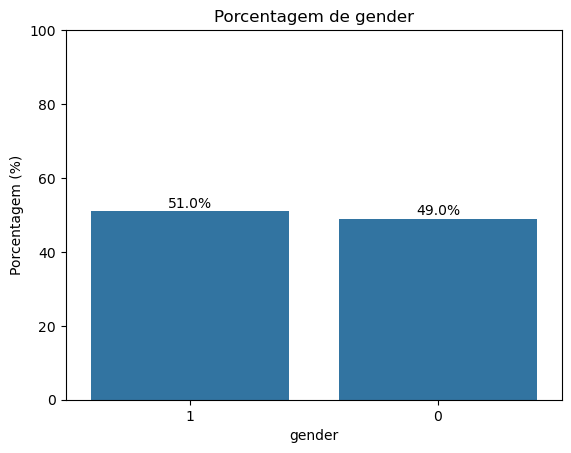

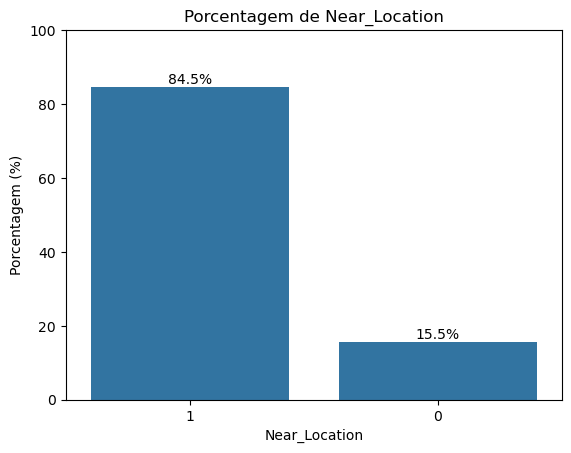

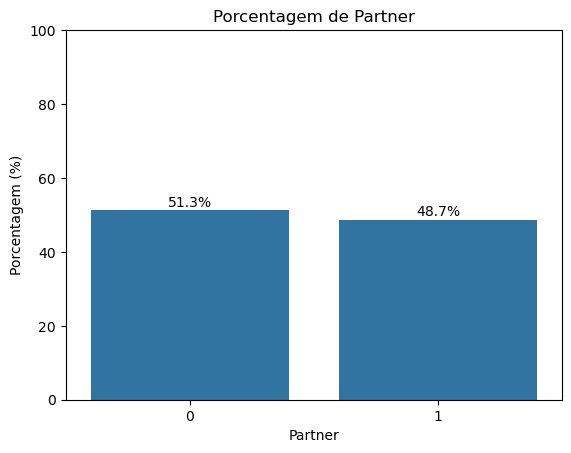

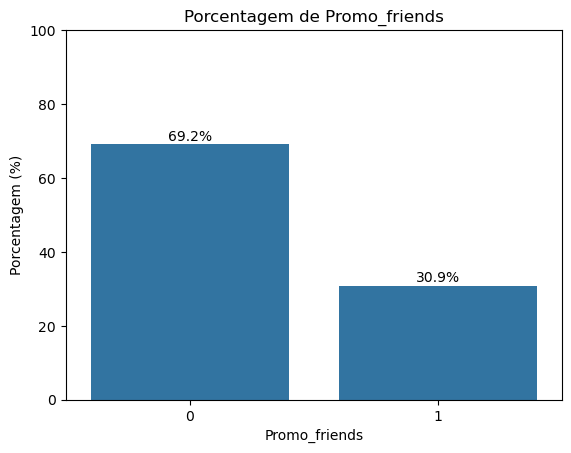

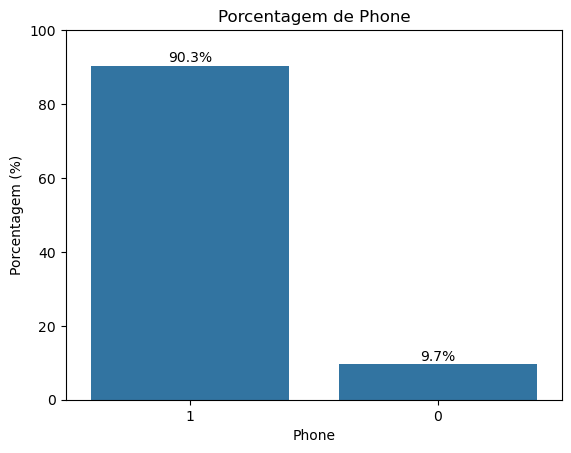

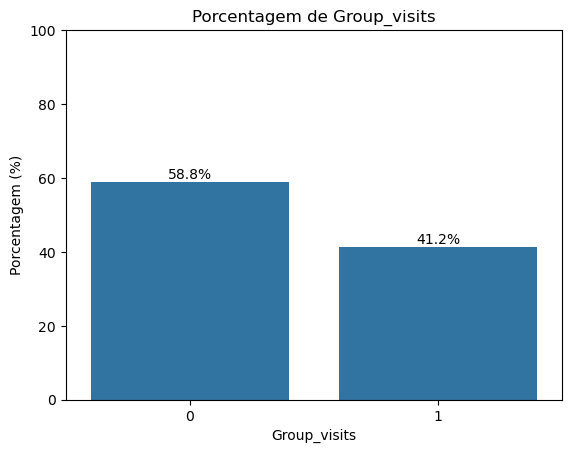

In [50]:
col_bar = [
    'Churn',
    'gender', 
    'Near_Location', 
    'Partner', 
    'Promo_friends', 
    'Phone',
    'Group_visits'
]

for col in col_bar:
    # Calcula a frequência relativa (porcentagem)
    percent = df[col].value_counts(normalize=True) * 100
    
    # Cria o gráfico
    sns.barplot(x=percent.index.astype(str), y=percent.values)
    
    # Adiciona os rótulos
    plt.title(f'Porcentagem de {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentagem (%)')
    
    # Adiciona os valores acima das barras
    for i, v in enumerate(percent.values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')
    
    plt.ylim(0, 100)  # Para manter escala uniforme
    plt.show()

<a id="exploracao_est"></a>
### 2.2 Exploração estatisticas

Observações: No geral não parecem haver diferenças discrepantes visiveis com exceção dos dados da variável 'Avg_additional_charges_total'

In [51]:
verif_mean_std = [
    'Age',
    'Avg_additional_charges_total',
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month'
]

for coluna in verif_mean_std:
    print(f"Coluna: {coluna}")
    print(f"Média: {df[coluna].mean()}")
    print(f"Desvio Padrão: {df[coluna].std()}")
    print(f"Variância: {df[coluna].var()}")

Coluna: Age
Média: 29.18425
Desvio Padrão: 3.258367102790019
Variância: 10.616956176544221
Coluna: Avg_additional_charges_total
Média: 146.94372780925002
Desvio Padrão: 96.3556023956799
Variância: 9284.402113034354
Coluna: Month_to_end_contract
Média: 4.32275
Desvio Padrão: 4.1912974340942055
Variância: 17.56697418104467
Coluna: Lifetime
Média: 3.72475
Desvio Padrão: 3.74926682004919
Variância: 14.057001687921764
Coluna: Avg_class_frequency_total
Média: 1.8790197125349366
Desvio Padrão: 0.9722448720306179
Variância: 0.9452600911898326
Coluna: Avg_class_frequency_current_month
Média: 1.7670518220405076
Desvio Padrão: 1.0529057174895295
Variância: 1.1086104499221412


<a id="histogramas"></a>
### 2.3 Histogramas

Observações: curvas dos histogramas fazem sentido com o tipo do negócio e período dos dados 

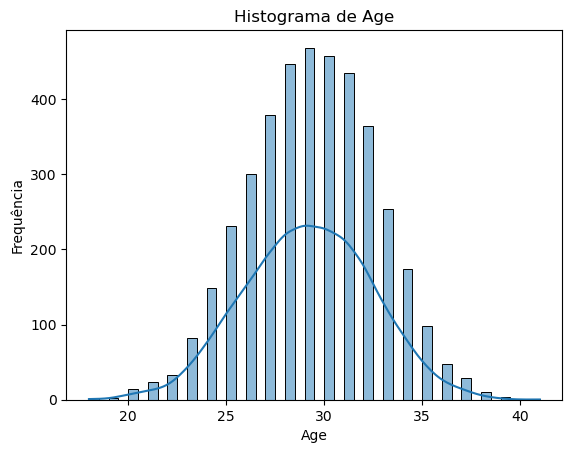

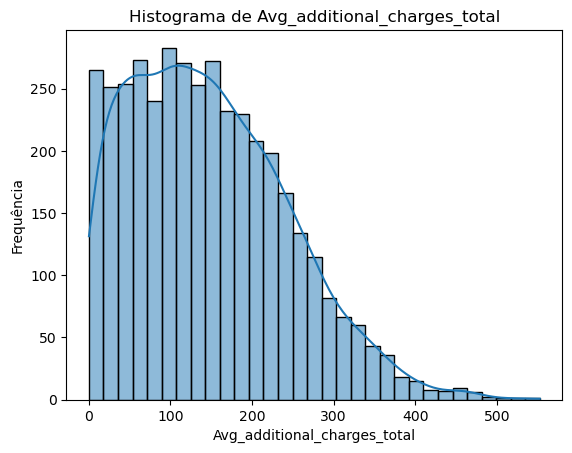

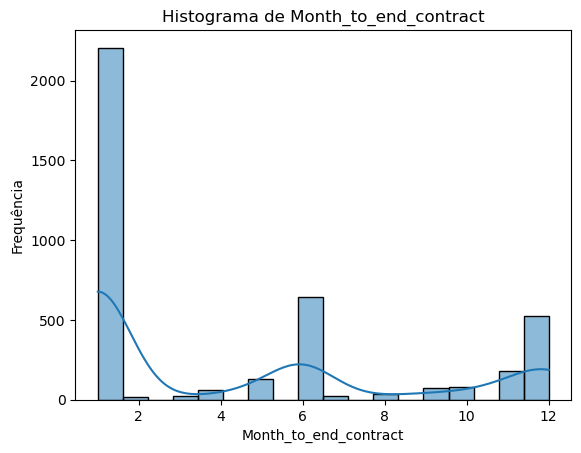

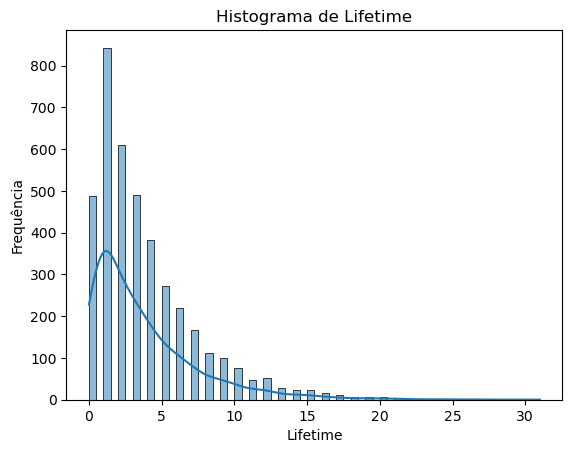

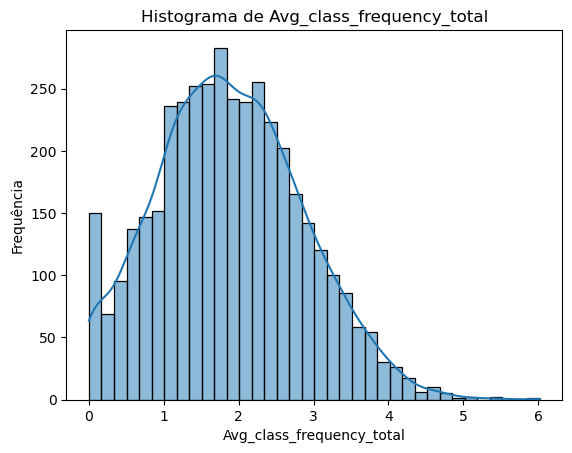

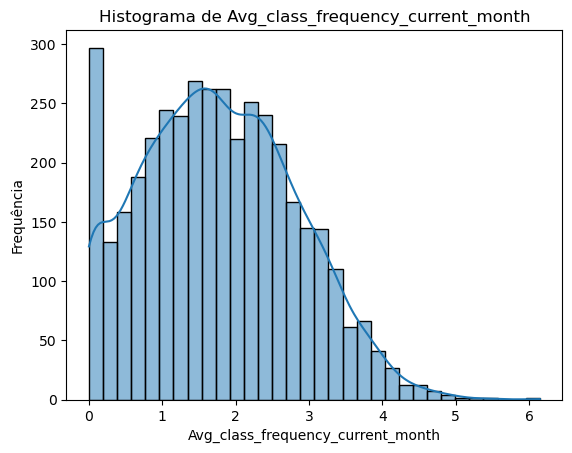

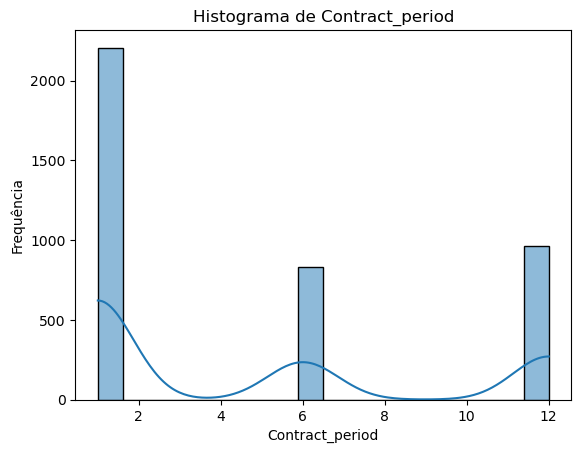

In [52]:
col_hist = [
    'Age',
    'Avg_additional_charges_total',
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Contract_period'
]


for col in col_hist:
    sns.histplot(df[col], kde=True)  # apenas a coluna atual
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

<a id="correl"></a>
### 2.4 Correlações

Observações: as variáveis não possuem grandes correlações entre si

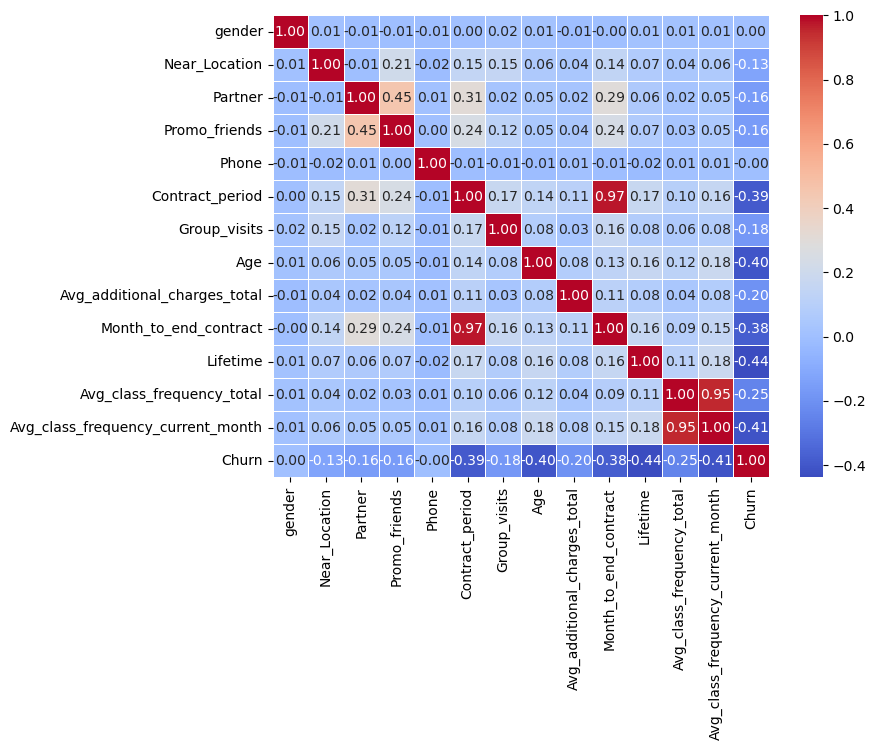

In [53]:
teste_corr1 = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(teste_corr1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5 )
plt.show()

<a id="machine"></a>
## 3. Preparação da Análise de Machine Learning

<a id="parametros"></a>
### 3.1 Parâmetros iniciais

In [54]:
# divisão dos dados em caracteristicas X - matriz e y - variável objetivo

y = df['Churn']
X = df.drop(columns = 'Churn')
target = 'Churn'

# --- 2. Configurações Globais e Geração de Dados de Exemplo ---
# Definir um estado aleatório para reprodutibilidade dos resultados

RANDOM_STATE = 0
TEST_SIZE = 0.2 

# print(X.columns)

In [55]:
# definição dos modelos de Machine Learning

# models = [Lasso(), 
#           Ridge(), 
#           LogisticRegression(),
#           DecisionTreeClassifier(),
#           RandomForestClassifier(), 
#           GradientBoostingClassifier(),
#           KMeans(n_clusters = 5), 
#           DecisionTreeRegressor(), 
#           RandomForestRegressor(), 
#           GradientBoostingRegressor()]

# classificacao = [LogisticRegression(),
#           DecisionTreeClassifier(), 
#           RandomForestClassifier(), 
#           GradientBoostingClassifier()]

# regressao = [Lasso(), 
#           Ridge(),
#           DecisionTreeRegressor(), 
#           RandomForestRegressor(), 
#           GradientBoostingRegressor()]          

# clustering = [KMeans(n_clusters = 5)]

# models_proj = [LogisticRegression(),
#           KMeans(n_clusters = 5),
#           RandomForestRegressor()]

<a id="metricas"></a>
### 3.2 Funções das métricas: Classificação e Regressão

In [56]:
# Funções de Métricas

def print_classification_metrics(y_true, y_pred, y_proba, model_name='Métricas de Classificação'):
    """
    Exibe métricas comuns para avaliação de modelos de classificação binária.

    Args:
        y_true (array): Valores reais das classes.
        y_pred (array): Previsões do modelo (classes).
        y_proba (array): Probabilidades estimadas para a classe positiva.
        title (str): Título da seção.
    """
    print(f"\n--- Métricas de Classificação para {model_name} ---")
    print('\tAcurácia: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecisão: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

    # Visualização da Matriz de Confusão
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues', ax=ax)
    ax.set_title(f'Matriz de Confusão para {model_name}')
    plt.show()   

def mape(y_true, y_pred):
    """
    Calcula o erro percentual absoluto médio (MAPE).

    Essa métrica representa o erro médio entre os valores reais e previstos em termos
    percentuais, sendo útil para entender a precisão relativa do modelo.

    Args:
        y_true (array): Valores reais.
        y_pred (array): Valores previstos.

    Returns:
        float: MAPE calculado em porcentagem.
    """
    # Adiciona um pequeno valor para evitar divisão por zero se y_true for 0
    y_true_safe = np.where(y_true == 0, 1e-10, y_true)
    perc_error_abs = np.abs((y_true - y_pred) / y_true_safe)
    return (np.mean(perc_error_abs)) * 100 # Retorna a média em porcentagem

    # y_error = y_true - y_pred
    # y_error_abs = np.abs(y_error)
    # perc_error_abs = y_error_abs / np.abs(y_true)
    # return (perc_error_abs.sum() / len(y_true))

def print_regression_metrics(y_true, y_pred, model_name='Métricas de Regressão'):
    """
    Exibe métricas para avaliação de modelos de regressão.

    MAE: Erro absoluto médio, EAM
    MSE: Erro quadrado médio, EQM, e nessa linha, REQM
    MSE R2: Coeficiente de determinação, ou R-quadrado (R2)
    MAPE: Erro percentual absoluto médio, EPAM

    Args:
        y_true (array): Valores reais.
        y_pred (array): Valores previstos pelo modelo.
        title (str): Título da seção.
    """
    print(f"\n--- Métricas de Regressão para {model_name} ---")
    print(f'  MAE (Erro Absoluto Médio): {mean_absolute_error(y_true, y_pred):.2f}')
    print(f'  MSE (Erro Quadrático Médio): {mean_squared_error(y_true, y_pred):.2f}')
    print(f'  RMSE (Raiz do Erro Quadrático Médio): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}')
    print(f'  R² (Coeficiente de Determinação): {r2_score(y_true, y_pred):.2f}')
    print(f'  MAPE (Erro Percentual Absoluto Médio): {mape(y_true, y_pred):.2f}%')


<a id="graf_import"></a>
### 3.3 Funções dos gráficos de importância: Classificação e Regressão

In [57]:
# Função para plotagem dos gráficos de importancia das variáveis

def plot_feature_importance(model, feature_names, model_name="Modelo"):
    """
    Gera um gráfico de barras mostrando a importância das variáveis para modelos
    que possuem 'feature_importances_' (baseados em árvores) ou 'coef_' (modelos lineares).
    """
    importance = None
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Para modelos lineares, o coeficiente pode ser um array 2D para classificação multi-classe.
        # Simplificamos pegando o valor absoluto para a importância visual.
        importance = model.coef_[0] if model.coef_.ndim > 1 else model.coef_
    else:
        print(f"O modelo {model_name} não possui atributos de importância de feature ou coeficientes.")
        return

    imp_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
    imp_df['importance_abs'] = np.abs(imp_df['importance']) # Usar valor absoluto para coeficientes
    imp_df = imp_df.sort_values(by='importance_abs', ascending=False)

    plt.figure(figsize=(10, min(8, len(imp_df) * 0.4))) # Ajusta a altura
    sns.barplot(data=imp_df.head(10), x='importance', y='feature', palette='viridis') # Mostra as top 10
    plt.title(f'Importância das Variáveis para {model_name}')
    plt.xlabel('Importância (ou Coeficiente)')
    plt.ylabel('Variável')
    plt.tight_layout()
    plt.show()

<a id="graf_import"></a>
### 3.3 Funções dos códigos para os métodos Classificaçãoe  Regressão

In [58]:
# Execução Manual por Tipo de Machine Learning
# Função Principal para Treinar e Avaliar Modelos

def run_classification_model(model, X_train_scaled, X_test_scaled, y_train, y_test, X_original_train_cols):
    """
    Executa um modelo de classificação: treina, prevê, calcula métricas e plota a importância de features.
    Treina o modelo passado como argumento e exibe as métricas
    apropriadas para o tipo de tarefa (classificação, regressão ou cluster).

    Args:
        model (sklearn model): Instância de modelo a ser treinada.
        X_train (array): Dados de treino.
        X_test (array): Dados de teste.
        y_train (array): Rótulos de treino.
        y_test (array): Rótulos de teste.
    """

    model_name = type(model).__name__
    print(f"\n{'='*20} Executando Modelo de Classificação: {model_name} {'='*20}")

    # Treinamento do Modelo
    print(f"Treinando {model_name}...")
    model.fit(X_train_scaled, y_train)

    # Previsões
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilidade da classe positiva

    # Avaliação das Métricas
    print_classification_metrics(y_test, y_pred, y_proba, model_name=model_name)

    # Interpretação: Importância das Features (se aplicável)
    if hasattr(model, 'feature_importances_') or hasattr(model, 'coef_'):
        plot_feature_importance(model, X_original_train_cols, model_name=model_name)
    else:
        print(f"O modelo {model_name} não fornece importância de features para plotagem.")
    print(f"{'='*20} Fim da Execução de {model_name} {'='*20}\n")

def run_regression_model(model, X_train_scaled, X_test_scaled, y_train, y_test, X_original_train_cols):
    """
    Executa um modelo de regressão: treina, prevê, calcula métricas e plota a importância de features.
    """
    model_name = type(model).__name__
    print(f"\n{'='*20} Executando Modelo de Regressão: {model_name} {'='*20}")

    # Treinamento do Modelo
    print(f"Treinando {model_name}...")
    model.fit(X_train_scaled, y_train)

    # Previsões
    y_pred = model.predict(X_test_scaled)

    # Avaliação das Métricas
    print_regression_metrics(y_test, y_pred, model_name=model_name)

    # Interpretação: Importância das Features (se aplicável)
    if hasattr(model, 'feature_importances_') or hasattr(model, 'coef_'):
        plot_feature_importance(model, X_original_train_cols, model_name=model_name)
    else:
        print(f"O modelo {model_name} não fornece importância de features para plotagem.")
    print(f"{'='*20} Fim da Execução de {model_name} {'='*20}\n")

<a id="cluster"></a>
### 3.4 Funções dos códigos os Gráficos Cluster

In [59]:
# Códigos para execução do dendograma

def plot_dendrogram(X_data, title='Dendrograma de Agrupamento Hierárquico'):
    """
    Gera um dendrograma para visualização de agrupamento hierárquico.
    """
    # Calcula a linkage matrix
    linked = linkage(X_data, method='ward') # 'ward' é um método comum

    plt.figure(figsize=(15, 8))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(title)
    plt.xlabel('Índice da Amostra')
    plt.ylabel('Distância')
    plt.show()


def show_clusters_on_plot(df_with_clusters, x_col, y_col, cluster_col, title="Visualização de Clusters"):
    """
    Cria um scatter plot para visualizar os clusters em relação a duas features.
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df_with_clusters[x_col], y=df_with_clusters[y_col],
                    hue=df_with_clusters[cluster_col].astype(str), # Converte para string para cores discretas
                    palette='tab10', s=100, alpha=0.7)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



<a id="previsao"></a>
## 4. Previsão de Churn / Rotatividade



################################################################################
### A. Análise e Modelagem para Classificação ###
################################################################################

--- 1. Preparação dos Dados para Classificação ---
Dados de Classificação divididos: Treino (3200 amostras), Teste (800 amostras)
Features de Classificação padronizadas com StandardScaler.


--- 2. Definição e Execução dos Modelos de Classificação ---

==================== Executando Modelo de Classificação: LogisticRegression ====================
Treinando LogisticRegression...

--- Métricas de Classificação para LogisticRegression ---
	Acurácia: 0.94
	Precisão: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98


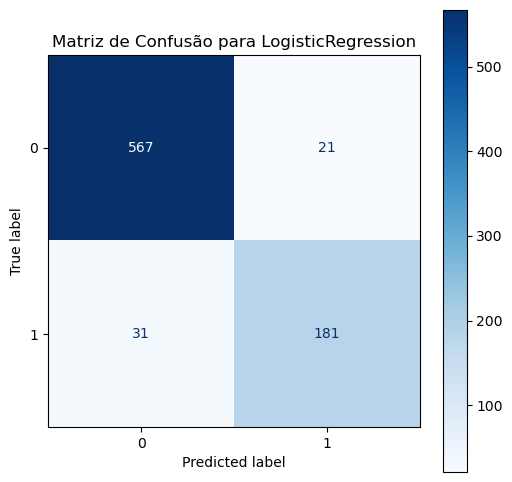

C:\Users\carlo\AppData\Local\Temp\ipykernel_15488\219283260.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df.head(10), x='importance', y='feature', palette='viridis') # Mostra as top 10


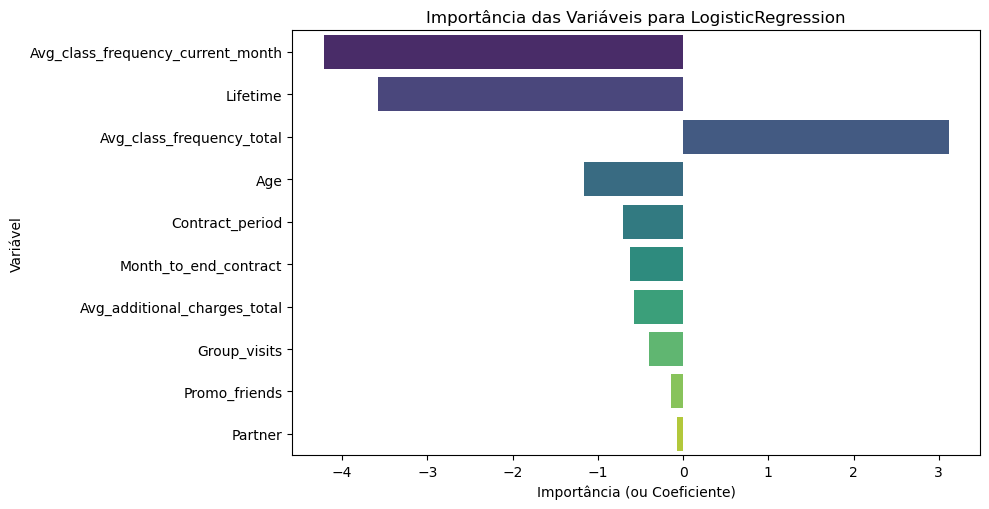

==================== Fim da Execução de LogisticRegression ====================



################################################################################
### B. Análise e Modelagem para Regressão ###
################################################################################

--- 1. Preparação dos Dados para Regressão ---
Dados de Regressão divididos: Treino (3200 amostras), Teste (800 amostras)
Features de Regressão padronizadas com StandardScaler.


--- 2. Definição e Execução dos Modelos de Regressão ---

==================== Executando Modelo de Regressão: RandomForestRegressor ====================
Treinando RandomForestRegressor...

--- Métricas de Regressão para RandomForestRegressor ---
  MAE (Erro Absoluto Médio): 0.12
  MSE (Erro Quadrático Médio): 0.06
  RMSE (Raiz do Erro Quadrático Médio): 0.24
  R² (Coeficiente de Determinação): 0.70
  MAPE (Erro Percentual Absoluto Médio): 65312500005.58%


C:\Users\carlo\AppData\Local\Temp\ipykernel_15488\219283260.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df.head(10), x='importance', y='feature', palette='viridis') # Mostra as top 10


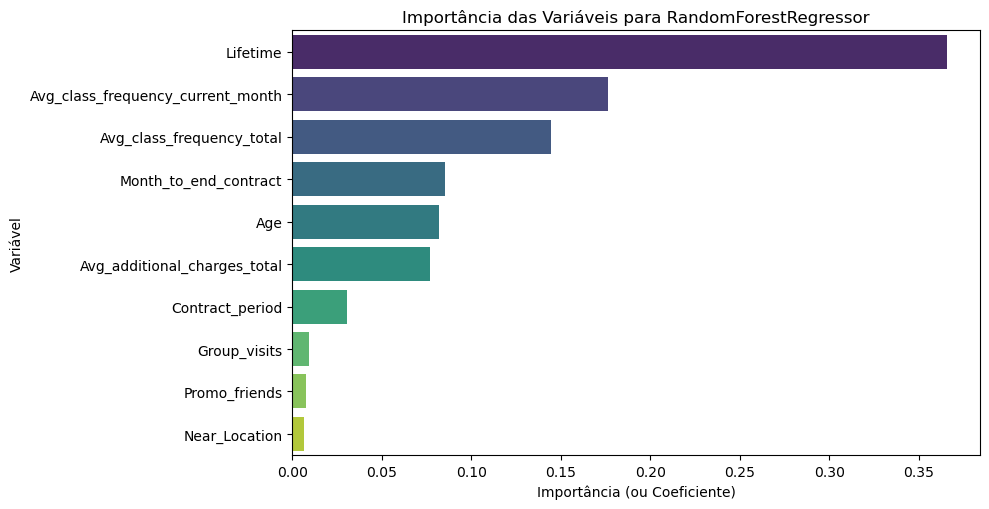

==================== Fim da Execução de RandomForestRegressor ====================



################################################################################
### C. Análise e Modelagem para Clusterização ###
################################################################################

--- 1. Preparação dos Dados para Clusterização ---
Features para Clusterização padronizadas com StandardScaler.


--- 2. Visualização de Agrupamento Hierárquico (Dendrograma) ---
O dendrograma ajuda a visualizar a estrutura hierárquica dos clusters e a decidir o número ideal de clusters.


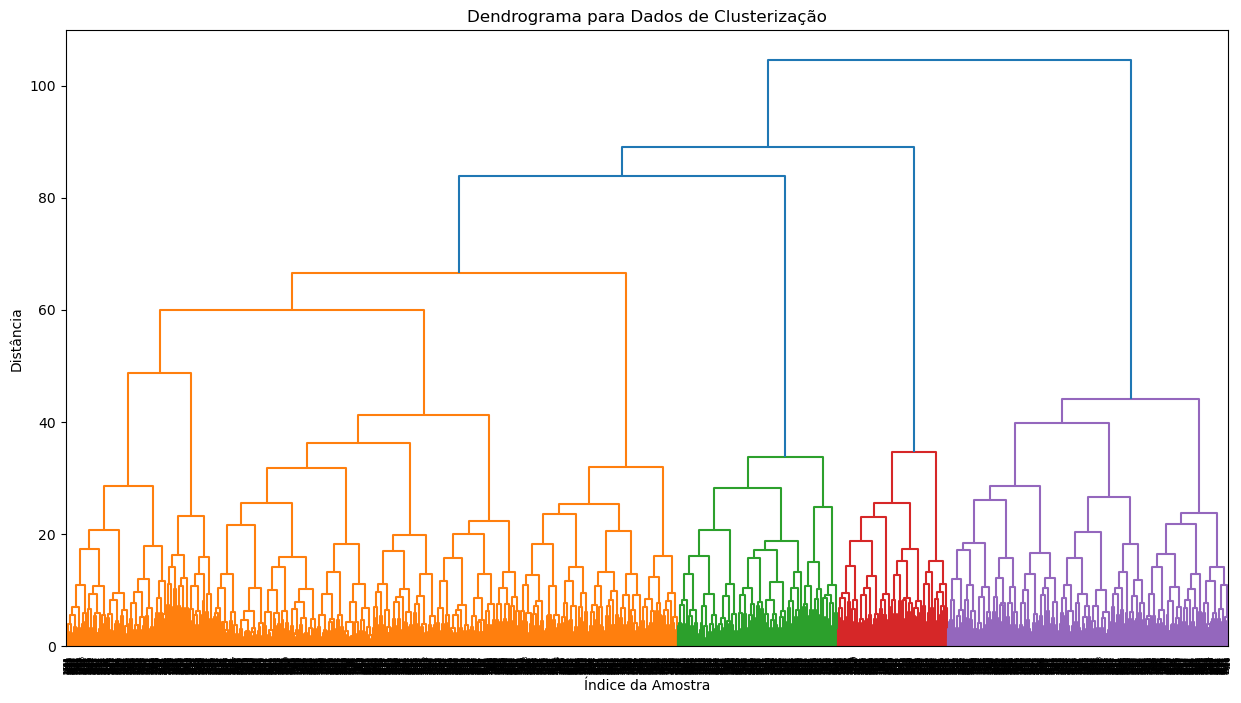


--- 3. Execução do K-Means ---
Treinando K-Means com 5 clusters...
Clusters atribuídos ao DataFrame.

Primeiras 5 linhas do DataFrame com clusters:
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4        

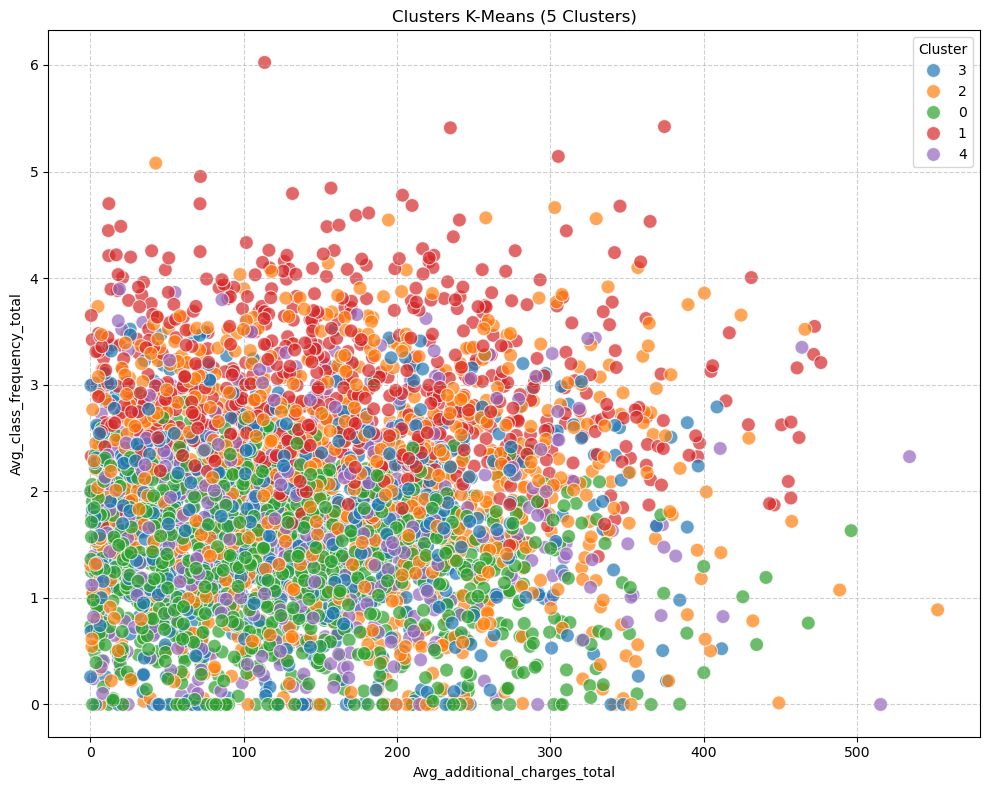


  Características médias por Cluster:
                  gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster_KMeans                                                               
0               0.486819       1.000000  0.243409       0.007030  0.899824   
1               0.592493       0.970509  0.288204       0.123324  0.898123   
2               0.499469       0.943677  0.740701       0.489904  0.900106   
3               0.483360       1.000000  0.798732       1.000000  0.911252   
4               0.496324       0.000000  0.466912       0.077206  0.915441   

                Contract_period  Group_visits        Age  \
Cluster_KMeans                                             
0                      1.978910      0.326889  28.239016   
1                      2.898123      0.482574  30.339142   
2                     11.866100      0.551541  29.905420   
3                      3.079239      0.445325  29.052298   
4                      2.209559      0.215074  28.4834

In [60]:
# --- 5. Bloco Principal de Execução ---
# A utilização de `if __name__ == "__main__":` garante que o código dentro
# deste bloco só será executado quando o script for rodado diretamente.
# Se este arquivo fosse importado como um módulo em outro script,
# o código aqui dentro não seria executado automaticamente. Isso é útil
# para organizar scripts Python e evitar que o código de "execução principal"
# seja rodado acidentalmente quando o arquivo é apenas uma biblioteca.

if __name__ == "__main__":

    # --- A. Análise e Modelagem para Classificação ---
    print("\n\n" + "#"*80)
    print("### A. Análise e Modelagem para Classificação ###")
    print("#"*80 + "\n")

    # 1. Preparação dos Dados para Classificação
    print("--- 1. Preparação dos Dados para Classificação ---")
    X_cls = df.drop(columns=[target])
    y_cls = df[target]

    # Divisão em treino e teste
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X_cls, y_cls, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_cls # Stratify para manter proporção das classes
    )
    print(f"Dados de Classificação divididos: Treino ({X_train_cls.shape[0]} amostras), Teste ({X_test_cls.shape[0]} amostras)")

    # Padronização dos dados (muito importante para muitos modelos)
    scaler_cls = StandardScaler()
    X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
    X_test_cls_scaled = scaler_cls.transform(X_test_cls)
    print("Features de Classificação padronizadas com StandardScaler.\n")

    # Mantém os nomes das colunas para os gráficos de importância
    X_train_cls_cols = X_train_cls.columns

    # 2. Definição e Execução dos Modelos de Classificação
    print("\n--- 2. Definição e Execução dos Modelos de Classificação ---")
    models_classification = [
        LogisticRegression(random_state=RANDOM_STATE),
        # DecisionTreeClassifier(random_state=RANDOM_STATE),
        # RandomForestClassifier(random_state=RANDOM_STATE),
        # GradientBoostingClassifier(random_state=RANDOM_STATE)
    ]

    for model_cls in models_classification:
        run_classification_model(model_cls, X_train_cls_scaled, X_test_cls_scaled, y_train_cls, y_test_cls, X_train_cls_cols)

    # --- B. Análise e Modelagem para Regressão ---
    print("\n\n" + "#"*80)
    print("### B. Análise e Modelagem para Regressão ###")
    print("#"*80 + "\n")

    # 1. Preparação dos Dados para Regressão
    print("--- 1. Preparação dos Dados para Regressão ---")
    X_reg = df.drop(columns=[target])
    y_reg = df[target]

    # Divisão em treino e teste
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    print(f"Dados de Regressão divididos: Treino ({X_train_reg.shape[0]} amostras), Teste ({X_test_reg.shape[0]} amostras)")

    # Padronização dos dados
    scaler_reg = StandardScaler()
    X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
    X_test_reg_scaled = scaler_reg.transform(X_test_reg)
    print("Features de Regressão padronizadas com StandardScaler.\n")

    # Mantém os nomes das colunas para os gráficos de importância
    X_train_reg_cols = X_train_reg.columns

    # 2. Definição e Execução dos Modelos de Regressão
    print("\n--- 2. Definição e Execução dos Modelos de Regressão ---")
    models_regression = [
        # Lasso(random_state=RANDOM_STATE),
        # Ridge(random_state=RANDOM_STATE),
        # DecisionTreeRegressor(random_state=RANDOM_STATE),
        RandomForestRegressor(random_state=RANDOM_STATE),
        # GradientBoostingRegressor(random_state=RANDOM_STATE)
    ]

    for model_reg in models_regression:
        run_regression_model(model_reg, X_train_reg_scaled, X_test_reg_scaled, y_train_reg, y_test_reg, X_train_reg_cols)

    # --- C. Análise e Modelagem para Clusterização ---
    print("\n\n" + "#"*80)
    print("### C. Análise e Modelagem para Clusterização ###")
    print("#"*80 + "\n")

    # 1. Preparação dos Dados para Clusterização
    print("--- 1. Preparação dos Dados para Clusterização ---")
    # Para clusterização (não supervisionada), não precisamos de uma variável objetivo 'y'.
    # Usaremos todas as features, exceto as variáveis target de classificação/regressão.
    X_cluster_original = df.drop(columns=[target])

    # Padronização é crucial para K-Means e outras técnicas baseadas em distância
    scaler_cluster = StandardScaler()
    X_cluster_scaled = scaler_cluster.fit_transform(X_cluster_original)
    print("Features para Clusterização padronizadas com StandardScaler.\n")

    # 2. Visualização de Agrupamento Hierárquico (Dendrograma)
    print("\n--- 2. Visualização de Agrupamento Hierárquico (Dendrograma) ---")
    print("O dendrograma ajuda a visualizar a estrutura hierárquica dos clusters e a decidir o número ideal de clusters.")
    plot_dendrogram(X_cluster_scaled, title='Dendrograma para Dados de Clusterização')

    # 3. Execução do K-Means (Exemplo de Modelo de Clusterização)
    print("\n--- 3. Execução do K-Means ---")
    # Para o K-Means, é comum escolher o número de clusters (k) previamente.
    # Você pode usar métodos como o "método do cotovelo" para ajudar a decidir o 'k'.
    N_CLUSTERS = 5 # Exemplo: Definindo 3 clusters com base na inspeção do dendrograma ou conhecimento do domínio.

    kmeans_model = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE, n_init='auto')
    print(f"Treinando K-Means com {N_CLUSTERS} clusters...")
    kmeans_model.fit(X_cluster_scaled)

    # Atribuir os rótulos de cluster de volta ao DataFrame original para visualização
    df_clustered = X_cluster_original.copy()
    df_clustered['Cluster_KMeans'] = kmeans_model.labels_
    print("Clusters atribuídos ao DataFrame.\n")
    print("Primeiras 5 linhas do DataFrame com clusters:")
    print(df_clustered.head())

    # 4. Avaliação e Interpretação dos Clusters
    print("\n--- 4. Avaliação e Interpretação dos Clusters ---")
    # Métricas de Clusterização:
    # Silhouette Score: Mede quão similar um objeto é ao seu próprio cluster em comparação com outros clusters.
    # Valores próximos de 1 indicam clusters bem separados; próximos de 0 indicam sobreposição; negativos indicam atribuição incorreta.
    print(f"  Silhouette Score: {silhouette_score(X_cluster_scaled, kmeans_model.labels_):.2f}")

    # Para Adjusted Rand Index (ARI), precisaríamos de rótulos verdadeiros, o que é raro em clusterização.
    # Por exemplo: print(f"  Adjusted Rand Index (ARI): {adjusted_rand_score(y_true_clusters, kmeans_model.labels_):.2f}")
    print("  Adjusted Rand Index (ARI) requer rótulos verdadeiros para comparação.")

    # Visualização dos Clusters (escolha duas features para plotar)
    print("\n  Visualização dos Clusters (usando 'Avg_additional_charges_total' e 'Avg_class_frequency_total' como exemplo):")
    show_clusters_on_plot(df_clustered, 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Cluster_KMeans',
                          title=f'Clusters K-Means ({N_CLUSTERS} Clusters)')

    # Análise das características de cada cluster
    print("\n  Características médias por Cluster:")
    print(df_clustered.groupby('Cluster_KMeans').mean())

    print(f"\n{'='*20} Fim da Execução de Clusterização {'='*20}\n")

<a id="resultados"></a>
## 5. Interpretação dos Resultados

    1 - Modelo Preditivo LogisticRegression(): 
    
    O modelo de regressão logística teve uma alta precisão de prever os casos de não Churn.
    Pelo fato da distribuição da Variável Churn ser desbalanceada, sendo 73,5% não Churn, o modelo preve melhor os casos não Churn.
    A curva ROC-AUC indicaram que esse método pode ser usado para identificar os clientes de alto risco de rotatividade.

    O modelo classificou as variáveis - Avg_class_frequency_total ; Avg_class_frequency_current_month - como inversas, o que é contra intuitivo, mas consigo enxergar duas possibilidades: 
    a- quando a frequencia total é baixa, a chance de Churn aumenta, portanto, quando a frequencia atual é maior, a chance de Churn é menor;
    b- a analise sendo somente de 2 meses, diminui a precisão dessa analise de frequencia;

    2 - Modelo RandomForestRegressor(): 

    Este modelo não parece ser o método apropriado para o seu problema. O motivo é simples: a sua variável y (Churn) é binária (0 ou 1), ou seja, um problema de classificação, não de regressão. Modelos de regressão tentam prever um valor contínuo, não uma classe binária.

    A variável RMSE = 0.24 é relativamente alto e deveria ser proximo de 0;
    A variável MAPE = 65312500005.58% que calcula o erro percentual, não esta sendo muito interpretável;

    2 - Modelo Kmeans(): 

    Gráfico Dendograma: a instrução 5 clusters pode não ser a melhor nesse caso. Um corte que em 4 divisões ou 8 clusters poderia ser mais apropriado, dependeria dos tipos de ações, tempo da equipe de focar em amais ou menos grupos;

    Silhouette Score = 0.13: valor baixo indica que os clusters não estão bem separados, com muita sobreposição - amontoados sem uma clara divisão entre eles;
    
    Gráfico de Dispersão - variáveis Avg_additional_charges_total x Avg_class_frequency_total: muita sobreposição - amontoados sem uma clara divisão entre eles. Aparentemente não são as variáveis que mais separam os grupos, foram selecionadas pelos pesos de importância mde acordo com os gráficos;



<a id="conclusao"></a>
## 6. Conclusão

In [61]:
medias_clusters = df_clustered.groupby('Cluster_KMeans').mean().reset_index()
medias_clusters

,Cluster_KMeans,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.486819,1.000000,0.243409,0.007030,0.899824,1.978910,0.326889,28.239016,130.877033,1.896309,2.477153,1.318003,1.083831
1,1,0.592493,0.970509,0.288204,0.123324,0.898123,2.898123,0.482574,30.339142,164.193829,2.654155,5.219839,2.937411,2.944131
2,2,0.499469,0.943677,0.740701,0.489904,0.900106,11.866100,0.551541,29.905420,165.146492,10.852285,4.737513,1.989423,1.980764
3,3,0.483360,1.000000,0.798732,1.000000,0.911252,3.079239,0.445325,29.052298,139.858265,2.873217,3.510301,1.665722,1.547717
4,4,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870


### Classificação Grupos Cluster

Classificação informal dos Grupos Cluster para facilitar a comunicação e direcionar o raciocínio aplicado.
A lógica foi baseada em alguma caractristica média que se sobresaiu

    0 = contrato curto baixa frequencia atual
    1 = alta frequencia
    2 = contrato longo
    3 = medianos
    4 = moram longe

Fatores de Risco e Retenção: A análise de importância do LogisticRegression revelou que a frequência de aulas no mês atual e o tempo de vida na academia são os maiores preditores de retenção.

Análise de Segmentação (K-Means): Embora o Silhouette Score seja baixo, a análise das médias por cluster revelou segmentos de clientes com perfis distintos.

    Recomendação de marketing: 

    1 - Criar uma lista de clientes com alta probabilidade de Churn (acima de um certo limite, como 0.8) e focar campanhas de retenção neles, como ofertas personalizadas ou contato direto.

    2 - Monitorar a frequência de visitas e enviar alertas ou lembretes (via app ou e-mail) para clientes cuja frequência no mês atual esteja diminuindo, para incentivá-los a retornar. 
    
    3 - Clientes com contratos de curto prazo também merecem atenção.


Exemplos de ações de marketing: Desenvolver estratégias de marketing personalizadas para cada segmento:

Para o segmento de (Cluster 0 - contrato curto), a estratégia pode ser oferecer upgrades ou descontos em contratos mais longos.

Para o segmento de (Cluster 3 - medianos), a estratégia pode ser um programa de recompensas para indicações contínuas, capitalizando em seu comportamento.

Para o segmento de (Cluster 4 - moram longe), planos com preços e horários flexíveis;

Para o segmento de (Cluster 1 - alta frequencia e Cluster - 2 - contrato longo), ações de pertencimento junto a marca e manutenção dos planos;


